In [1]:
"""
优化参数使用
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.breaker.r_break_strategy_5 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

2020-01-17 09:39:58.181631	开始加载历史数据
2020-01-17 09:39:58.184592	历史数据加载完成，数据量：83340
2020-01-17 09:39:58.430948	策略初始化完成
2020-01-17 09:39:58.430948	开始回放历史数据
2020-01-17 09:40:02.162630	历史数据回放结束
2020-01-17 09:40:02.163178	开始计算逐日盯市盈亏
2020-01-17 09:40:02.168164	逐日盯市盈亏计算完成
2020-01-17 09:40:02.169162	开始计算策略统计指标
2020-01-17 09:40:02.178507	------------------------------
2020-01-17 09:40:02.179471	首个交易日：	2019-03-06
2020-01-17 09:40:02.179471	最后交易日：	2019-12-31
2020-01-17 09:40:02.179471	总交易日：	204
2020-01-17 09:40:02.179471	盈利交易日：	53
2020-01-17 09:40:02.179471	亏损交易日：	45
2020-01-17 09:40:02.179471	起始资金：	1,000,000.00
2020-01-17 09:40:02.179471	结束资金：	1,318,158.05
2020-01-17 09:40:02.179471	总收益率：	31.82%
2020-01-17 09:40:02.179471	年化收益：	37.43%
2020-01-17 09:40:02.179471	最大回撤: 	-24,112.19
2020-01-17 09:40:02.179471	百分比最大回撤: -1.93%
2020-01-17 09:40:02.179471	最长回撤天数: 	21
2020-01-17 09:40:02.179471	总盈亏：	318,158.05
2020-01-17 09:40:02.179471	总手续费：	13,813.55
2020-01-17 09:40:02.179471	总滑点：	29,000.00
2020-01-17 

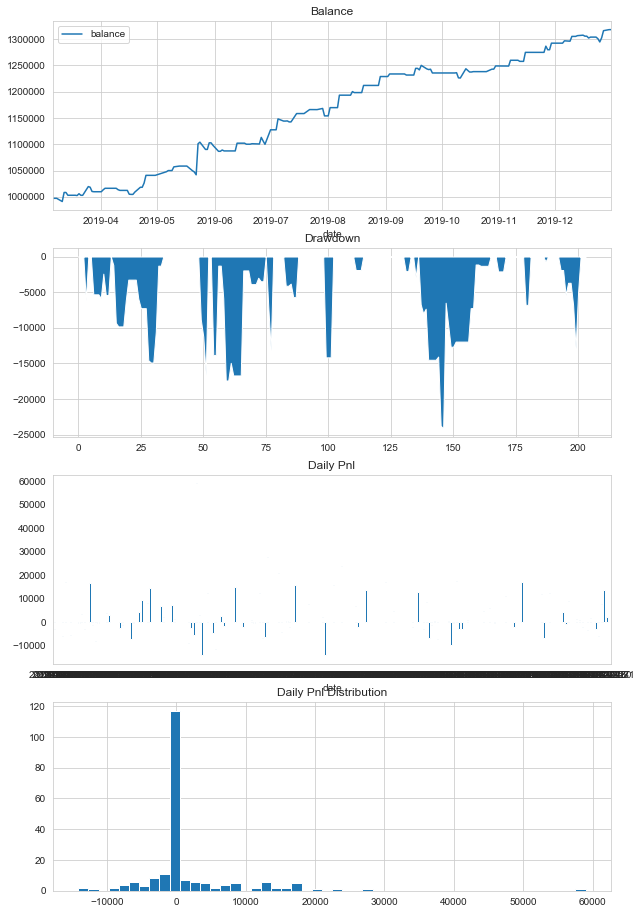

In [5]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BU99.SHFE",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.3/10000,  # 保证金比例
    slippage=0.2,  # 滑点
    size=10,  # 合约乘数
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(RBreakStrategy, {
    'break_rate': 0.5,
    'stop_rate': 0.5,
    'tend_length': 12,
    'fixed_size': 50
})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("break_rate", 0.4, 0.6, 0.1)
setting.add_parameter("stop_rate", 0.4, 0.6, 0.1)
setting.add_parameter("tend_length", 10, 30, 2)

engine.run_ga_optimization(setting)

2020-01-17 08:51:41.986481	参数优化空间：99
2020-01-17 08:51:41.987472	每代族群总数：100
2020-01-17 08:51:41.987472	优良筛选个数：80
2020-01-17 08:51:41.987472	迭代次数：30
2020-01-17 08:51:41.987472	交叉概率：95%
2020-01-17 08:51:41.987472	突变概率：5%
2020-01-17 08:51:41.987472	开始加载历史数据
2020-01-17 08:51:41.989467	历史数据加载完成，数据量：83340
2020-01-17 08:51:42.159052	策略初始化完成
2020-01-17 08:51:42.159052	开始回放历史数据
2020-01-17 08:51:44.375289	历史数据回放结束
2020-01-17 08:51:44.375289	开始计算逐日盯市盈亏
2020-01-17 08:51:44.380273	逐日盯市盈亏计算完成
2020-01-17 08:51:44.380273	开始计算策略统计指标
2020-01-17 08:51:44.389307	开始加载历史数据
2020-01-17 08:51:44.390309	历史数据加载完成，数据量：83340
2020-01-17 08:51:44.523888	策略初始化完成
2020-01-17 08:51:44.523888	开始回放历史数据
2020-01-17 08:51:46.621327	历史数据回放结束
2020-01-17 08:51:46.622282	开始计算逐日盯市盈亏
2020-01-17 08:51:46.625277	逐日盯市盈亏计算完成
2020-01-17 08:51:46.626274	开始计算策略统计指标
2020-01-17 08:51:46.633256	开始加载历史数据
2020-01-17 08:51:46.635258	历史数据加载完成，数据量：83340
2020-01-17 08:51:46.755927	策略初始化完成
2020-01-17 08:51:46.755927	开始回放历史数据
2020-01-17 08:51:48.898

2020-01-17 08:52:53.389967	历史数据回放结束
2020-01-17 08:52:53.389967	开始计算逐日盯市盈亏
2020-01-17 08:52:53.399989	逐日盯市盈亏计算完成
2020-01-17 08:52:53.399989	开始计算策略统计指标
2020-01-17 08:52:53.415897	开始加载历史数据
2020-01-17 08:52:53.418928	历史数据加载完成，数据量：83340
2020-01-17 08:52:53.748011	策略初始化完成
2020-01-17 08:52:53.749008	开始回放历史数据
2020-01-17 08:52:57.697509	历史数据回放结束
2020-01-17 08:52:57.697509	开始计算逐日盯市盈亏
2020-01-17 08:52:57.703434	逐日盯市盈亏计算完成
2020-01-17 08:52:57.703434	开始计算策略统计指标
2020-01-17 08:52:57.717396	开始加载历史数据
2020-01-17 08:52:57.718396	历史数据加载完成，数据量：83340
2020-01-17 08:52:57.979739	策略初始化完成
2020-01-17 08:52:57.980733	开始回放历史数据
2020-01-17 08:53:01.143278	历史数据回放结束
2020-01-17 08:53:01.144291	开始计算逐日盯市盈亏
2020-01-17 08:53:01.150224	逐日盯市盈亏计算完成
2020-01-17 08:53:01.151218	开始计算策略统计指标
2020-01-17 08:53:01.162233	开始加载历史数据
2020-01-17 08:53:01.164240	历史数据加载完成，数据量：83340
2020-01-17 08:53:01.371755	策略初始化完成
2020-01-17 08:53:01.371755	开始回放历史数据
2020-01-17 08:53:04.054655	历史数据回放结束
2020-01-17 08:53:04.055657	开始计算逐日盯市盈亏
2020-01-17 08:53:

2020-01-17 08:53:59.892851	历史数据回放结束
2020-01-17 08:53:59.892851	开始计算逐日盯市盈亏
2020-01-17 08:53:59.896835	逐日盯市盈亏计算完成
2020-01-17 08:53:59.896835	开始计算策略统计指标
2020-01-17 08:53:59.904814	开始加载历史数据
2020-01-17 08:53:59.905815	历史数据加载完成，数据量：83340
2020-01-17 08:54:00.039453	策略初始化完成
2020-01-17 08:54:00.039453	开始回放历史数据
2020-01-17 08:54:02.102937	历史数据回放结束
2020-01-17 08:54:02.103936	开始计算逐日盯市盈亏
2020-01-17 08:54:02.106927	逐日盯市盈亏计算完成
2020-01-17 08:54:02.107924	开始计算策略统计指标
2020-01-17 08:54:02.115903	开始加载历史数据
2020-01-17 08:54:02.116904	历史数据加载完成，数据量：83340
2020-01-17 08:54:02.242564	策略初始化完成
2020-01-17 08:54:02.243561	开始回放历史数据
2020-01-17 08:54:04.310043	历史数据回放结束
2020-01-17 08:54:04.310043	开始计算逐日盯市盈亏
2020-01-17 08:54:04.315026	逐日盯市盈亏计算完成
2020-01-17 08:54:04.316024	开始计算策略统计指标
2020-01-17 08:54:04.324002	开始加载历史数据
2020-01-17 08:54:04.325006	历史数据加载完成，数据量：83340
2020-01-17 08:54:04.477589	策略初始化完成
2020-01-17 08:54:04.477589	开始回放历史数据
2020-01-17 08:54:06.528110	历史数据回放结束
2020-01-17 08:54:06.528110	开始计算逐日盯市盈亏
2020-01-17 08:54:

2020-01-17 08:55:00.864385	历史数据回放结束
2020-01-17 08:55:00.864385	开始计算逐日盯市盈亏
2020-01-17 08:55:00.868335	逐日盯市盈亏计算完成
2020-01-17 08:55:00.868335	开始计算策略统计指标
2020-01-17 08:55:00.876317	开始加载历史数据
2020-01-17 08:55:00.878318	历史数据加载完成，数据量：83340
2020-01-17 08:55:01.034934	策略初始化完成
2020-01-17 08:55:01.034934	开始回放历史数据
2020-01-17 08:55:03.091395	历史数据回放结束
2020-01-17 08:55:03.091395	开始计算逐日盯市盈亏
2020-01-17 08:55:03.096382	逐日盯市盈亏计算完成
2020-01-17 08:55:03.096382	开始计算策略统计指标
2  	100   	[2.92645125]	[0.22024764]	[2.67043354]	[3.39330263]
2020-01-17 08:55:03.114730	开始加载历史数据
2020-01-17 08:55:03.115731	历史数据加载完成，数据量：83340
2020-01-17 08:55:03.255396	策略初始化完成
2020-01-17 08:55:03.255396	开始回放历史数据
2020-01-17 08:55:05.391692	历史数据回放结束
2020-01-17 08:55:05.391692	开始计算逐日盯市盈亏
2020-01-17 08:55:05.395678	逐日盯市盈亏计算完成
2020-01-17 08:55:05.395678	开始计算策略统计指标
3  	100   	[3.15232932]	[0.14022153]	[2.95740087]	[3.39330263]
4  	100   	[3.2747853] 	[0.12776598]	[3.13704894]	[3.39330263]
2020-01-17 08:55:05.418651	开始加载历史数据
2020-01-17 08:55:05

[({'break_rate': 0.5, 'stop_rate': 0.5, 'tend_length': 12},
  3.393302627020908,
  {})]